# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [3]:
import numpy as np
import math
import random

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [4]:
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

### Generate psuedo random clusters

In [ ]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0), 
    (2, 0), 
    (0, 1), 
    (3, 2)
]
# The values change how "spread out" the data is.  Feel feel to play with them. 
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])

data

,label,x,y
0,0,-0.668191,0.511056
1,0,0.386390,-0.003434
2,0,-0.487220,1.138796
3,0,-0.325185,1.378638
4,0,0.220329,0.505609
...,...,...,...
75,3,4.090855,1.534194
76,3,3.315303,1.977781
77,3,3.778867,2.104564
78,3,2.365536,3.455312


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

kmeans_1 = KMeans(n_clusters=4, random_state=0, n_init='auto')

kmeans_1.fit(data)

KMeans(n_clusters=4, random_state=0)

### Visualze the data

<Axes: xlabel='x', ylabel='y'>

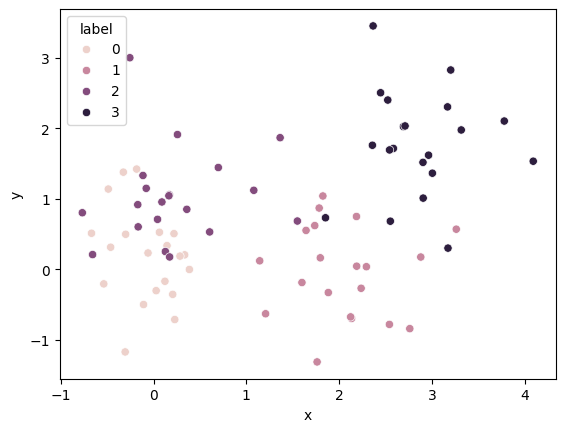

In [ ]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here

In [ ]:
def get_clusters(points: np.ndarray, cluster_array) -> tuple[np.ndarray, np.ndarray]:
    # Fill in the details.  This function should probably consist of some kind of loop,
    # and the work within that loop should mostly be done via calls to other functions 
    # that you define and that carry out small, specific tasks
    cluster_counts = [0] * len(cluster_array) #tracks the number of points in each cluster
    prev_labels = points[:, 0].copy()#get the labels of the points prior to changing anything 

    for point in points:
        closest_cent_index = find_closest_centroid(point, cluster_array)
        cluster_counts[closest_cent_index] += 1 #update cluster count
        point[0] = closest_cent_index # update point label
   
    #print(cluster_counts)
   
    if (prev_labels == points[:,0]).all(): #if clusters have not stabalized 
        # Return the centroids and the closest centroid for each datapoint
        print('exit')
        return  points, cluster_array
    else:
        cluster_array = update_centroids(points, cluster_array, cluster_counts)
        get_clusters(points, cluster_array)
    
    

def get_distance(points, centroids): #point is tuple of x and y coods 
    #gets the distance between two points according to this formula d = sqrt((x2 - x1)^2 + (y2 - y1)^2)
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    closest_cluster = np.argmin(distances, axis=0)
    return closest_cluster

def clear_count(cluster_array):
    cluster_array[:,3] = 0
    
def find_closest_centroid(point: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    distances = []
    for centroid in centroids:
        distances.append(get_distance(point, centroid))
    closest_cent_index = distances.index(min(distances))
    return closest_cent_index

def update_centroids(points,cluster_array, cluster_counts):
    df = pd.DataFrame(points, columns=['label', 'x', 'y'])
    #print(f'in: {cluster_array}')   
    for i, cluster in enumerate(cluster_array):
        x_sum =  df.loc[df['label'] == i, 'x'].sum() 
        cluster[0] = x_sum/ cluster_counts[i]
        y_sum = df.loc[df['label'] == i, 'y'].sum()
        #print(y_sum)
        cluster[1] = y_sum / cluster_counts[i]
    #print(f'out: {cluster_array}')    
    return cluster_array
        
        
def init_clusters(data, n_clusters):
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    return centroids
    
n_clusters = 4

points = data.to_numpy()
data = np.delete(points, 0, axis=1)
cluster_array = init_clusters(data, n_clusters)

points, centroids = get_clusters(points, cluster_array)



AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
points = pd.DataFrame(points, columns=['label', 'x', 'y'])

<Axes: xlabel='x', ylabel='y'>

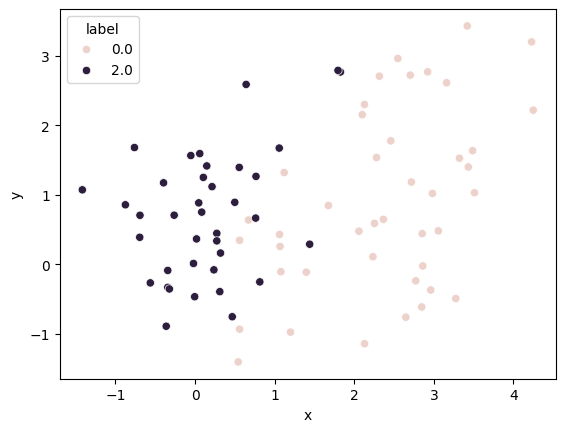

In [ ]:
sns.scatterplot(
    data=points,
    x='x',
    y='y',
    hue='label'
)